In [39]:
%reset
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs
import netCDF4 as nc
import matplotlib.ticker as mticker
import warnings; warnings.filterwarnings('ignore')
import cmocean
from gsw import alpha, SA_from_SP, p_from_z, CT_from_pt, beta, sigma1, sigma0
%ls

Once deleted, variables cannot be recovered. Proceed (y/[n])? y
20070101.ice_5daily.nc    20070101.ocean_static_no_mask_table.nc
20070101.ocean_5daily.nc  20070101.Vertical_coordinate.nc
20070101.ocean_static.nc


In [40]:
%cd /work/eay/OM4_rerun2/20070101.nc/
fs=xr.open_dataset('20070101.ocean_static_no_mask_table.nc')
lon=fs['geolon']; lat=fs['geolat']
lonu=fs['geolon_u']; latu=fs['geolat_u']
lonv=fs['geolon_v']; latv=fs['geolat_v']
print(fs)


/work2/eay/OM4_rerun2/20070101.nc
<xarray.Dataset>
Dimensions:    (time: 1, xh: 1440, xq: 1440, yh: 1080, yq: 1080)
Coordinates:
  * xh         (xh) float64 -299.7 -299.5 -299.2 -299.0 ... 59.53 59.78 60.03
  * yh         (yh) float64 -80.39 -80.31 -80.23 -80.15 ... 89.73 89.84 89.95
  * time       (time) object 1900-01-01 00:00:00
  * xq         (xq) float64 -299.6 -299.3 -299.1 -298.9 ... 59.66 59.91 60.16
  * yq         (yq) float64 -80.35 -80.27 -80.19 -80.11 ... 89.78 89.89 90.0
Data variables:
    areacello  (yh, xh) float32 ...
    geolon     (yh, xh) float32 ...
    geolat     (yh, xh) float32 ...
    geolon_c   (yq, xq) float32 ...
    geolat_c   (yq, xq) float32 ...
    geolon_u   (yh, xq) float32 ...
    geolat_u   (yh, xq) float32 ...
    geolon_v   (yq, xh) float32 ...
    geolat_v   (yq, xh) float32 ...
    wet        (yh, xh) float32 ...
    wet_c      (yq, xq) float32 ...
    wet_u      (yh, xq) float32 ...
    wet_v      (yq, xh) float32 ...
    dxt        (yh, xh) flo

In [21]:
title1='2007-03-17' #J16 F15 M17 A16 M16 J15 Jy15 A14 S18 O18 N17 D17
title2='2007-12-17'
data1=xr.open_dataset('20070101.ocean_5daily.nc').sel(time=title1)
data1=xr.merge([fs.geolon, fs.geolat, data1]); data1=xr.merge([fs.geolon_u,fs.geolat_u,fs.geolon_v,fs.geolat_v,data1])
data2=xr.open_dataset('20070101.ocean_5daily.nc').sel(time=title2)
data2=xr.merge([fs.geolon, fs.geolat, data2]); data2=xr.merge([fs.geolon_u,fs.geolat_u,fs.geolon_v,fs.geolat_v,data2])

depth=data1['depth_ocean']
salt1=data1['so'].isel(zl=0); temp1=data1['thetao'].isel(zl=0); 
salt2=data2['so'].isel(zl=0); temp2=data2['thetao'].isel(zl=0);

#u=nc.Dataset('20030101.ocean_5daily.nc')['uh'][0,0,:,:]
#v=nc.Dataset('20030101.ocean_5daily.nc')['vh'][0,0,:,:]
#u[u>=1e18]=np.nan; v[v>=1e18]=np.nan;
#umag=(u**2+v**2)**0.5 #use nc.Dataset for u,v because xarray causes memory error here


print(data1)

<xarray.Dataset>
Dimensions:           (time: 1, xh: 1440, xq: 1440, yh: 1080, yq: 1080, zi: 76, zl: 75)
Coordinates:
  * yh                (yh) float64 -80.39 -80.31 -80.23 ... 89.73 89.84 89.95
  * xq                (xq) float64 -299.6 -299.3 -299.1 ... 59.66 59.91 60.16
  * xh                (xh) float64 -299.7 -299.5 -299.2 ... 59.53 59.78 60.03
  * yq                (yq) float64 -80.35 -80.27 -80.19 ... 89.78 89.89 90.0
  * time              (time) object 2007-03-17 00:00:00
  * zl                (zl) float64 1.0 3.0 5.0 ... 3.338e+03 3.591e+03 5.111e+03
  * zi                (zi) float64 0.0 2.0 4.0 ... 3.461e+03 3.722e+03 6.5e+03
Data variables:
    geolon_u          (yh, xq) float32 ...
    geolat_u          (yh, xq) float32 ...
    geolon_v          (yq, xh) float32 ...
    geolat_v          (yq, xh) float32 ...
    geolon            (yh, xh) float32 ...
    geolat            (yh, xh) float32 ...
    zos               (time, yh, xh) float32 ...
    thetao            (time, zl,

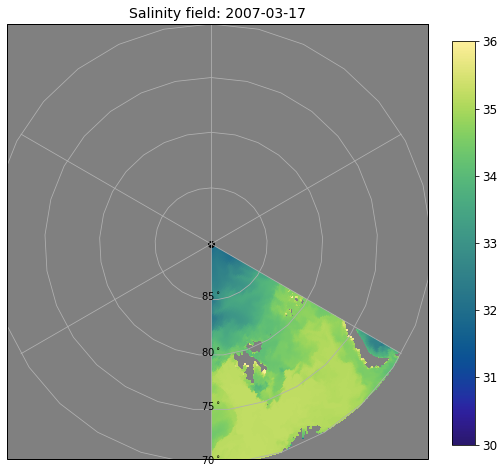

In [22]:
fig = plt.figure(figsize=(8, 8))
ax1 = fig.add_axes([.92, 0.15, 0.04, .7])
ax = plt.axes(projection=ccrs.Orthographic(0, 90))
ax.set_extent([-180, 180, 70, 90],ccrs.PlateCarree())

clon=lon.where(data1.geolat>70).where(data1.geolon>0).where(data1.geolon<60)
clat=lat.where(data1.geolat>70).where(data1.geolon>0).where(data1.geolon<60)
cdata=salt1[0,:,:].where(data1.geolat>70).where(data1.geolon>0).where(data1.geolon<60)

plt.pcolormesh(lon, lat,np.ones((1080,1440)),transform=ccrs.PlateCarree(),cmap='gray',vmin=0,vmax=2);
plt.pcolor(clon,clat,cdata,transform=ccrs.PlateCarree(),vmax=36, vmin=30,cmap=cmocean.cm.haline);
plt.colorbar(cax=ax1); ax1.tick_params(labelsize=12)

gl=ax.gridlines(crs=ccrs.PlateCarree())
plt.title('Salinity field: '+title1,fontsize=14)
gl.ylocator = mticker.FixedLocator([70, 75, 80, 85, 90])

ax.scatter(180, 90, marker='o',c='black', transform=ccrs.PlateCarree())
pointx=[0,0,0,0]; pointy=[70,75,80,85]; text=['70$^\circ$','75$^\circ$','80$^\circ$','85$^\circ$']
for i in range(len(pointx)):
    ax.text(pointx[i],pointy[i],text[i],ha='center', transform=ccrs.PlateCarree())

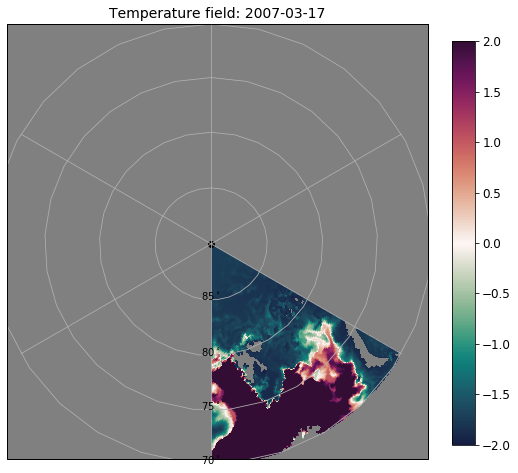

In [23]:
fig = plt.figure(figsize=(8, 8))
ax1 = fig.add_axes([.92, 0.15, 0.04, .7])
ax = plt.axes(projection=ccrs.Orthographic(0, 90))
ax.set_extent([-180, 180, 70, 90],ccrs.PlateCarree())

clon=lon.where(data1.geolat>70).where(data1.geolon>0).where(data1.geolon<60)
clat=lat.where(data1.geolat>70).where(data1.geolon>0).where(data1.geolon<60)
cdata=temp1[0,:,:].where(data1.geolat>70).where(data1.geolon>0).where(data1.geolon<60)

plt.pcolormesh(lon, lat,np.ones((1080,1440)),transform=ccrs.PlateCarree(),cmap='gray',vmin=0,vmax=2);
plt.pcolor(clon,clat,cdata,transform=ccrs.PlateCarree(),vmax=2, vmin=-2,cmap=cmocean.cm.curl);
plt.colorbar(cax=ax1); ax1.tick_params(labelsize=12)

gl=ax.gridlines(crs=ccrs.PlateCarree())
plt.title('Temperature field: '+title1,fontsize=14)
gl.ylocator = mticker.FixedLocator([70, 75, 80, 85, 90])

ax.scatter(180, 90, marker='o',c='black', transform=ccrs.PlateCarree())
pointx=[0,0,0,0]; pointy=[70,75,80,85]; text=['70$^\circ$','75$^\circ$','80$^\circ$','85$^\circ$']
for i in range(len(pointx)):
    ax.text(pointx[i],pointy[i],text[i],ha='center', transform=ccrs.PlateCarree())

In [24]:
def wright_eos(T,S,p):
  """                                                                                                                                                                                                              
                                                                                                                                                                                                                   
 **********************************************************************                                                                                                                                            
   The subroutines in this file implement the equation of state for   *                                                                                                                                            
   sea water using the formulae given by  Wright, 1997, J. Atmos.     *                                                                                                                                            
   Ocean. Tech., 14, 735-740.  Coded by R. Hallberg, 7/00.            *                                                                                                                                            
 ***********************************************************************                                                                                                                                           
    Converted to Python from F90 by M Harrison 10/11.                                                                                                                                                              
                                                                                                                                                                                                                   
 Calculate seawater equation of state, given T[degC],S[PSU],p[Pa]                                                                                                                                                  
 Returns density [kg m-3]                                                                                                                                                                                          
                                                                                                                                                                                                                   
 ***********************************************************************                                                                                                                                           
                                                                                                                                                                                                                   
 """

  a0 = 7.057924e-4; a1 = 3.480336e-7; a2 = -1.112733e-7;
  b0 = 5.790749e8;  b1 = 3.516535e6;  b2 = -4.002714e4;
  b3 = 2.084372e2;  b4 = 5.944068e5;  b5 = -9.643486e3;
  c0 = 1.704853e5;  c1 = 7.904722e2;  c2 = -7.984422;
  c3 = 5.140652e-2; c4 = -2.302158e2; c5 = -3.079464;

  al0 = a0 + a1*T +a2*S
  p0  = b0 + b4*S + T * (b1 + T*(b2 + b3*T) + b5*S)
  lam = c0 +c4*S + T * (c1 + T*(c2 + c3*T) + c5*S)
  I_denom = 1.0 / (lam + al0*(p+p0))
  rho = (p + p0) * I_denom

  return rho

In [25]:
#Calculate potential density
density1=wright_eos(temp1,salt1,0) #1000 dbar = 100 bar = 100*10^5Pa
density2=wright_eos(temp2,salt2,0) 

print(np.max(density1),np.max(density2))
print(np.min(density1),np.min(density2))

<xarray.DataArray ()>
array(1032.58850098)
Coordinates:
    zl       float64 1.0 <xarray.DataArray ()>
array(1032.10913086)
Coordinates:
    zl       float64 1.0
<xarray.DataArray ()>
array(995.21563721)
Coordinates:
    zl       float64 1.0 <xarray.DataArray ()>
array(995.69000244)
Coordinates:
    zl       float64 1.0


In [12]:
e1.shape

NameError: name 'e1' is not defined

In [32]:
e=data1['e'].where(data1.geolat>70)#The elevations are the same for different months.
thickness=np.diff(-e,axis=1)
dx=np.tile(fs['dxt'],[1,75,1,1])
dy=np.tile(fs['dyt'],[1,75,1,1])
volumefull=(dx*dy*thickness)

#Filter by lat lon depth!!
#tempfull1=data1['thetao'].where(data1.geolat>70).where(depth<200); saltfull1=data1['so'].where(data1.geolat>70).where(depth<200); densityfull1=wright_eos(tempfull1,saltfull1,0.0)
#tempfull2=data2['thetao'].where(data2.geolat>70).where(depth<200); saltfull2=data2['so'].where(data2.geolat>70).where(depth<200); densityfull2=wright_eos(tempfull2,saltfull2,0.0)
tempfull1=data1['thetao'].where(data1.geolat>70); saltfull1=data1['so'].where(data1.geolat>70); densityfull1=wright_eos(tempfull1,saltfull1,0.0)
tempfull2=data2['thetao'].where(data2.geolat>70); saltfull2=data2['so'].where(data2.geolat>70); densityfull2=wright_eos(tempfull2,saltfull2,0.0)

march1=densityfull1.where(data1.geolon>0).where(data1.geolon<60)
march2=densityfull1.where(data1.geolon>-300).where(data1.geolon<-240)
march3=densityfull1.where(data1.geolon>-240).where(data1.geolon<-180)
march4=densityfull1.where(data1.geolon>-180).where(data1.geolon<-120)
march5=densityfull1.where(data1.geolon>-120).where(data1.geolon<-60)
march6=densityfull1.where(data1.geolon>-60).where(data1.geolon<0)

december1=densityfull2.where(data2.geolon>0).where(data2.geolon<60)
december2=densityfull2.where(data2.geolon>-300).where(data2.geolon<-240)
december3=densityfull2.where(data2.geolon>-240).where(data2.geolon<-180)
december4=densityfull2.where(data2.geolon>-180).where(data2.geolon<-120)
december5=densityfull2.where(data2.geolon>-120).where(data2.geolon<-60)
december6=densityfull2.where(data2.geolon>-60).where(data2.geolon<0)
print('done')

done


In [33]:
np.shape(densityfull1)

(1, 75, 1080, 1440)

In [34]:
bins=np.zeros(28); bins[0]=1026; bins[-1]=1028.5; bins[1:-1]=np.linspace(1026,1028.5,26); 
histdecember1=0*bins; histdecember2=0*bins; histdecember3=0*bins; histdecember4=0*bins; histdecember5=0*bins; histdecember6=0*bins;
histmarch1=0*bins; histmarch2=0*bins; histmarch3=0*bins; histmarch4=0*bins; histmarch5=0*bins; histmarch6=0*bins;
print(bins)
for i in range(len(bins)):
    if i==0:
        histmarch1[i]=np.sum(volumefull[np.where(march1<bins[i])])
        histmarch2[i]=np.sum(volumefull[np.where(march2<bins[i])])
        histmarch3[i]=np.sum(volumefull[np.where(march3<bins[i])])
        histmarch4[i]=np.sum(volumefull[np.where(march4<bins[i])])
        histmarch5[i]=np.sum(volumefull[np.where(march5<bins[i])])
        histmarch6[i]=np.sum(volumefull[np.where(march6<bins[i])])
        
        histdecember1[i]=np.sum(volumefull[np.where(december1<bins[i])])
        histdecember2[i]=np.sum(volumefull[np.where(december2<bins[i])])
        histdecember3[i]=np.sum(volumefull[np.where(december3<bins[i])])
        histdecember4[i]=np.sum(volumefull[np.where(december4<bins[i])])
        histdecember5[i]=np.sum(volumefull[np.where(december5<bins[i])])
        histdecember6[i]=np.sum(volumefull[np.where(december6<bins[i])])
        print(i)
    elif i==len(bins)-1:
        histmarch1[i]=np.sum(volumefull[np.where(march1>=bins[i])])
        histmarch2[i]=np.sum(volumefull[np.where(march2>=bins[i])])
        histmarch3[i]=np.sum(volumefull[np.where(march3>=bins[i])])
        histmarch4[i]=np.sum(volumefull[np.where(march4>=bins[i])])
        histmarch5[i]=np.sum(volumefull[np.where(march5>=bins[i])])
        histmarch6[i]=np.sum(volumefull[np.where(march6>=bins[i])])
        
        histdecember1[i]=np.sum(volumefull[np.where(december1>=bins[i])])
        histdecember2[i]=np.sum(volumefull[np.where(december2>=bins[i])])
        histdecember3[i]=np.sum(volumefull[np.where(december3>=bins[i])])
        histdecember4[i]=np.sum(volumefull[np.where(december4>=bins[i])])
        histdecember5[i]=np.sum(volumefull[np.where(december5>=bins[i])])
        histdecember6[i]=np.sum(volumefull[np.where(december6>=bins[i])])
        print(i)
    else:
        histmarch1[i]=np.sum(volumefull[np.where((march1 >= bins[i]) & (march1 < bins[i+1]))])
        histmarch2[i]=np.sum(volumefull[np.where((march2 >= bins[i]) & (march2 < bins[i+1]))])
        histmarch3[i]=np.sum(volumefull[np.where((march3 >= bins[i]) & (march3 < bins[i+1]))])
        histmarch4[i]=np.sum(volumefull[np.where((march4 >= bins[i]) & (march4 < bins[i+1]))])
        histmarch5[i]=np.sum(volumefull[np.where((march5 >= bins[i]) & (march5 < bins[i+1]))])
        histmarch6[i]=np.sum(volumefull[np.where((march6 >= bins[i]) & (march6 < bins[i+1]))])
        
        histdecember1[i]=np.sum(volumefull[np.where((december1 >= bins[i]) & (december1 < bins[i+1]))])
        histdecember2[i]=np.sum(volumefull[np.where((december2 >= bins[i]) & (december2 < bins[i+1]))])
        histdecember3[i]=np.sum(volumefull[np.where((december3 >= bins[i]) & (december3 < bins[i+1]))])
        histdecember4[i]=np.sum(volumefull[np.where((december4 >= bins[i]) & (december4 < bins[i+1]))])
        histdecember5[i]=np.sum(volumefull[np.where((december5 >= bins[i]) & (december5 < bins[i+1]))])
        histdecember6[i]=np.sum(volumefull[np.where((december6 >= bins[i]) & (december6 < bins[i+1]))])

        print(i)
    
    

[1026.  1026.  1026.1 1026.2 1026.3 1026.4 1026.5 1026.6 1026.7 1026.8
 1026.9 1027.  1027.1 1027.2 1027.3 1027.4 1027.5 1027.6 1027.7 1027.8
 1027.9 1028.  1028.1 1028.2 1028.3 1028.4 1028.5 1028.5]
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27


1.0

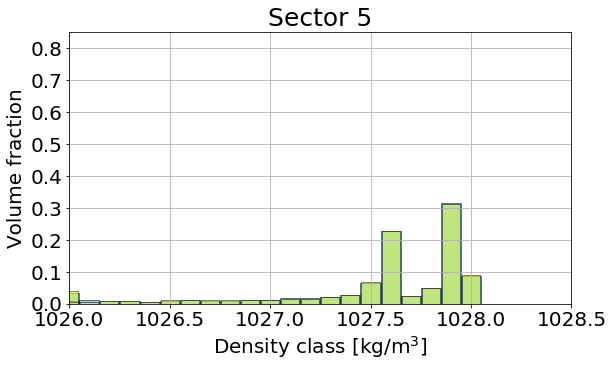

In [57]:
fig = plt.figure(figsize=(9, 5))
plt.bar(bins,histmarch5/np.nansum(histmarch5),width=.1,color=[0, .6, 1],alpha=0.5,edgecolor='black')
plt.bar(bins,histdecember5/np.nansum(histdecember5),width=.09,color=[1, 1, 0],alpha=0.5,edgecolor='black')

plt.grid()
plt.xlabel('Density class [kg/m$^3$]',fontsize=20)
#plt.gca().axes.xaxis.set_ticklabels([])


plt.xlim([1026,1028.5]); plt.xticks(fontsize=20)

plt.ylim([0, 0.85]); plt.yticks(fontsize=20)
plt.ylabel('Volume fraction',fontsize=20)
#plt.legend(['March','December'],fontsize=20,loc='upper right')
plt.title('Sector 5',fontsize=25)
sum(histmarch4/np.sum(histmarch4))

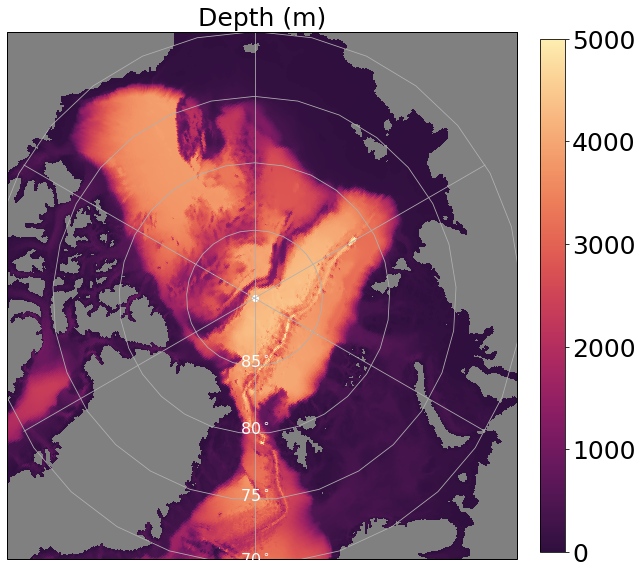

In [40]:
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection=ccrs.Orthographic(0, 90))
ax.set_extent([-180, 180, 70, 90],ccrs.PlateCarree())

plt.pcolormesh(lon, lat,np.ones((1080,1440)),transform=ccrs.PlateCarree(),cmap='gray',vmin=0,vmax=2);
PC=plt.pcolormesh(lon, lat,depth,transform=ccrs.PlateCarree(),cmap=cmocean.cm.matter_r,vmin=0,vmax=5000);
#CT=plt.contour(lon, lat, deptho, [200], transform=ccrs.PlateCarree(),colors='k',linewidth=.5)


cbar=plt.colorbar(PC,fraction=0.046, pad=0.04); cbar.ax.tick_params(labelsize=25);
gl=ax.gridlines(crs=ccrs.PlateCarree())
plt.title('Depth (m)',fontsize=25)
gl.ylocator = mticker.FixedLocator([70, 75, 80, 85, 90])


ax.scatter(180, 90, marker='o',c='white', transform=ccrs.PlateCarree())
pointx=[0,0,0,0]; pointy=[70,75,80,85]; text=['70$^\circ$','75$^\circ$','80$^\circ$','85$^\circ$']
for i in range(len(pointx)):
    ax.text(pointx[i],pointy[i],text[i],ha='center', transform=ccrs.PlateCarree(),fontsize=16,color='white')


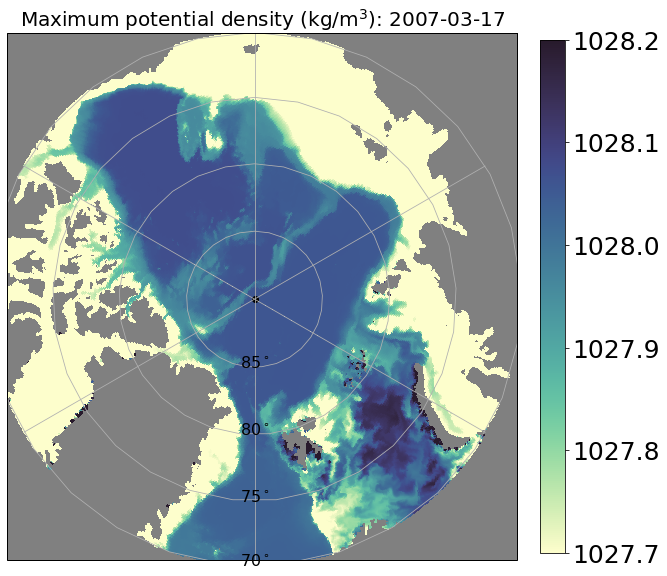

In [35]:
maxdensity=np.max(densityfull1,axis=1)

fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection=ccrs.Orthographic(0, 90))
ax.set_extent([-180, 180, 70, 90],ccrs.PlateCarree())

plt.pcolormesh(lon, lat,np.ones((1080,1440)),transform=ccrs.PlateCarree(),cmap='gray',vmin=0,vmax=2);
PC=plt.pcolormesh(lon, lat,maxdensity[0,:,:],transform=ccrs.PlateCarree(),vmin=1027.7,vmax=1028.2,cmap=cmocean.cm.deep); 
#CT=plt.contour(lon, lat, deptho, [200], transform=ccrs.PlateCarree(),colors='k',linewidth=.5)


cbar=plt.colorbar(PC,fraction=0.046, pad=0.04); cbar.ax.tick_params(labelsize=25);
gl=ax.gridlines(crs=ccrs.PlateCarree())
plt.title('Maximum potential density (kg/m$^3$): '+title1,fontsize=20) 
gl.ylocator = mticker.FixedLocator([70, 75, 80, 85, 90])


ax.scatter(180, 90, marker='o',c='black', transform=ccrs.PlateCarree())
pointx=[0,0,0,0]; pointy=[70,75,80,85]; text=['70$^\circ$','75$^\circ$','80$^\circ$','85$^\circ$']
for i in range(len(pointx)):
    ax.text(pointx[i],pointy[i],text[i],ha='center', transform=ccrs.PlateCarree(),fontsize=16,color='black')




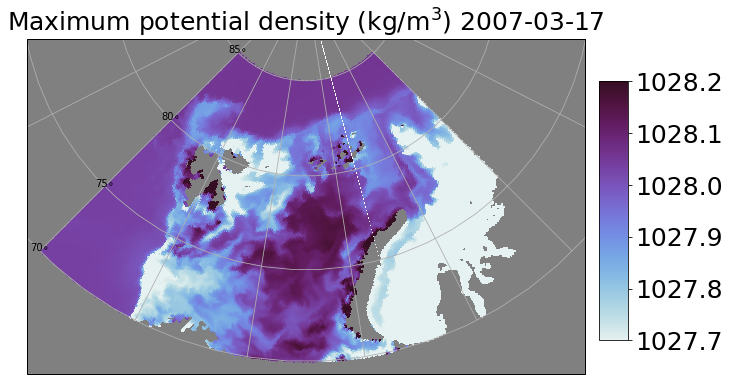

In [38]:
maxdensityi=maxdensity.where(data1.geolon>0).where(data1.geolon<60)\
    .where(data1.geolat>70).where(data1.geolat<85)
maxdensityj=maxdensity.where(data1.geolon>-300).where(data1.geolon<-270)\
    .where(data1.geolat>70).where(data1.geolat<85)
fig = plt.figure(figsize=(10, 8)) 
ax1 = fig.add_axes([.92, 0.27, 0.04, .45]) 
ax = plt.axes(projection=ccrs.Orthographic(45,90))

ax.set_extent([0, 90, 69, 86],ccrs.PlateCarree()) 
plt.pcolormesh(lon, lat,np.ones((1080,1440)),transform=ccrs.PlateCarree(),cmap='gray',vmin=0,vmax=2); 
plt.pcolormesh(lon, lat,maxdensityi[0,:,:],transform=ccrs.PlateCarree(),vmin=1027.7,vmax=1028.2,cmap=cmocean.cm.dense); 
plt.pcolormesh(lon, lat,maxdensityj[0,:,:],transform=ccrs.PlateCarree(),vmin=1027.7,vmax=1028.2,cmap=cmocean.cm.dense); 

cbar=plt.colorbar(cax=ax1) 
cbar.ax.tick_params(labelsize=25);
gl=ax.gridlines(crs=ccrs.PlateCarree()) 
plt.title('Maximum potential density (kg/m$^3$) '+title1,fontsize=25) 
gl.ylocator = mticker.FixedLocator([70, 75, 80, 85, 90])

ax.scatter(180, 90, marker='o',c='black', transform=ccrs.PlateCarree()) 
pointx=[0,0,0,0]; pointy=[70,75,80,85]; 

text=['70∘','75∘','80∘','85∘'] 
for i in range(len(pointx)): 
    ax.text(pointx[i],pointy[i],text[i],ha='center', transform=ccrs.PlateCarree())